In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [3]:
input_train.shape

(60000, 28, 28)

In [4]:
input_test.shape

(10000, 28, 28)

In [5]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [7]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [8]:
# Create the model
model = Sequential()
# Encoder Part
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=8 , kernel_size=(3, 3), activation='relu'))
# Decoder Part
model.add(Conv2DTranspose(filters=8 , kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters=32, kernel_size=(3,3), activation='relu'))
# 
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [9]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 8)         1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 26, 26, 16)        1168      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         2

In [11]:
model.fit(x = input_train, y = input_train, epochs = 1, batch_size = 1000, validation_split = 0.2)

48/48 [==============================] - 57s 1s/step - loss: 0.3902 - val_loss: 0.1050


In [12]:
# Generate reconstructions
# we want to predict 8 images!
number_of_samples = 8
samples = input_test[:number_of_samples]
targets = target_test[:number_of_samples]
reconstructions = model.predict(samples)
reconstructions.shape

(8, 28, 28, 1)

In [13]:
#sample = samples[0][:, :, :]
#sample.shape
#targets

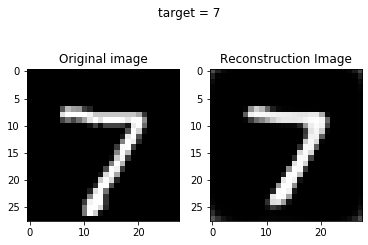

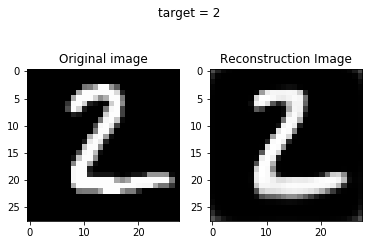

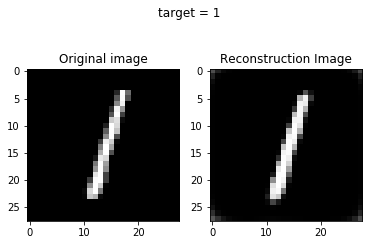

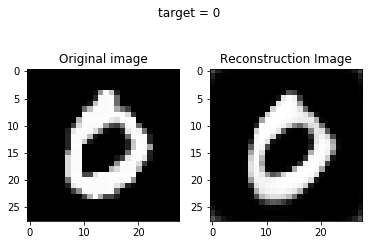

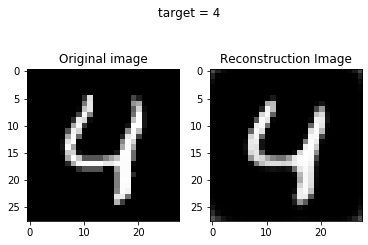

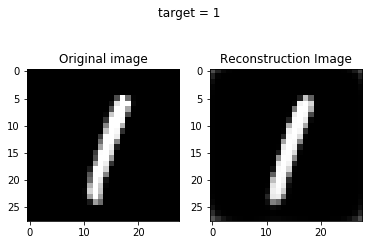

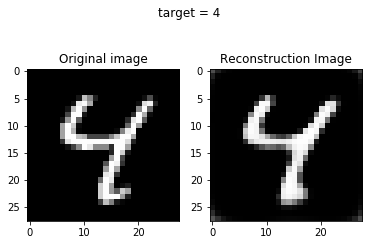

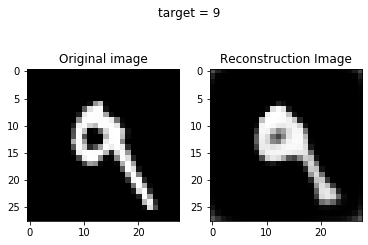

In [14]:
# Plot reconstructions
for i in np.arange(0, number_of_samples):
    
    # Get the sample and the reconstruction
    sample = samples[i][:, :, 0]
    reconstruction = reconstructions[i][:, :, 0]
    
    # Original Images
    input_class = targets[i]
    
    # Matplotlib preparations
    fig, axes = plt.subplots(1, 2)
    # Plot sample and reconstruciton
    plt.gray()
    axes[0].imshow(sample)
    axes[0].set_title('Original image')
    axes[1].imshow(reconstruction)
    axes[1].set_title('Reconstruction Image')
    fig.suptitle(f'target = {input_class}')
    plt.show()

In [15]:
sample

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
reconstruction

array([[3.02354872e-01, 1.29016131e-01, 3.62437069e-02, 9.25835967e-03,
        2.66581774e-03, 1.13040209e-03, 7.89433718e-04, 6.94304705e-04,
        6.75261021e-04, 6.46352768e-04, 6.13182783e-04, 5.86748123e-04,
        5.74290752e-04, 5.74558973e-04, 5.87135553e-04, 6.08414412e-04,
        6.36458397e-04, 6.65634871e-04, 6.89327717e-04, 7.02679157e-04,
        7.07000494e-04, 7.60674477e-04, 1.04933977e-03, 2.37962604e-03,
        7.51650333e-03, 2.82082856e-02, 1.04774445e-01, 2.75409102e-01],
       [1.34371877e-01, 1.27459466e-02, 6.73413277e-04, 3.75294767e-05,
        3.13399642e-06, 5.64762843e-07, 2.44410472e-07, 1.78698087e-07,
        1.63807371e-07, 1.43357809e-07, 1.21916372e-07, 1.06897090e-07,
        1.00904167e-07, 1.00352551e-07, 1.03185585e-07, 1.10679167e-07,
        1.24529450e-07, 1.45663421e-07, 1.67657092e-07, 1.83171821e-07,
        1.89553631e-07, 2.39716996e-07, 5.59819284e-07, 3.95212373e-06,
        4.82599935e-05, 8.19444656e-04, 1.30363405e-02, 1.25911